# Assignment: Spam Classification

## Task: Detect Spam in SMS messages   

Kaggle challenge: https://www.kaggle.com/uciml/sms-spam-collection-dataset

### Problem description
**Context**
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

## Data
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet.



# Task 1: Problem Statement
Discuss the problem setting and the first implecations of the given data set... 
* What assumptions can we make about the data?
*Largest enough Sample.
*It is collection of random set of messages.

* What problems are we expecting?
Find a way to encode a text into numbers
Assuming there will be redundant words in the data.
Representing text as numerical data
There would be unwanted spaces between the characters that is required to clean out

# Task 2: First Data Analysis and Cleaning
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...

see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import scipy.sparse
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Melanie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('spam.csv' , encoding = "ISO-8859-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [5]:
data.groupby('v1').describe()

Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                      v2         \
          top freq count unique   
v1                                
ham   GNT:-)"    2  4825   4516   
spam      NaN  NaN   747    653   

                                                              
                                                    top freq  
v1                                                            
ham                              Sorry, I'll call later   30  
spam  Please call our customer service representativ...    4

We have 4825 ham message and 747 spam message

In [6]:
# convert label to a numerical variable
data['v1_num'] = data.v1.map({'ham':0, 'spam':1})
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v1_num
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [7]:
data['v2_len'] = data.v2.apply(len)
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v1_num,v2_len
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,61


Text(0.5,0,'message length')

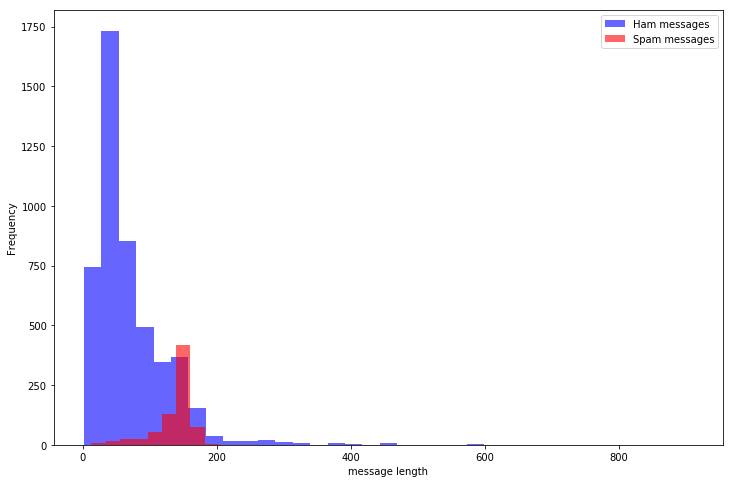

In [8]:
plt.figure(figsize=(12, 8))

data[data.v1=='ham'].v2_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
data[data.v1=='spam'].v2_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("message length")

In [9]:
data[data.v1=='ham'].describe()

,v1_num,v2_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [10]:
data[data.v1=='spam'].describe()

,v1_num,v2_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [11]:
data[data.v2_len == 910].v2.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [12]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [13]:
data['clean_msg'] = data.v2.apply(text_process)

In [14]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,v1_num,v2_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,61,Nah think goes usf lives around though


In [15]:
words = data[data.v1=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [16]:
words = data[data.v1=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


# Task 3: Feature Extraction
## Hint : see lecture of week 6
#### How can we handle text?
We can choose 2 option Vectorize the text into most common words for identifiying word combinations that most likely will be spam. The second option is to make simple fields to understand overall structure such as we saw above with the length of the two labels had drastically different length distributions
#### Discuss possible features for a numerical repressentation!
As noted above we can convert the words into a Vector for boolean variables to indicate if that each word was present or not in the data. Or with background knowledge on the subject we could do more feature creation based on structure or topics contained in the messages .
#### How can we obtain a compact and non-sparse representation?
We can obtain via data knowledge and recalculate fields given our background knowledge. Length, certain word counts such as FREE or call (see often in CTA for Marketing Purpose). 

See: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

In [17]:
X = data.clean_msg
y = data.v1_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [19]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [42]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [43]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 9971 stored elements in Compressed Sparse Row format>

# Task 4: Train a Random Forrest Model
* Train and evaluate the model using the approach from task 3
#### Discuss the results -> possible improvements?
The first results are decent with overall accuracy is good however due the unbalance data set the spam indicated is neglible precent. Through best parameters selection we can find the best tuned parameters for the training set. Below you will see this resulted in much better resuts as 1.00 on the label case 1 and test set with 0.98, which is really good accuracy/Percision. 

* Use RF feature importance to see which features are driving the RF Decission

See: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [44]:
X, y = make_classification(n_samples=1000, n_features=7996,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_dtm, y_train)
#print(clf.predict([[0, 0, 0, 0]]))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
predictTrainLabel = clf.predict(X_train_dtm)
print (classification_report(y_train,predictTrainLabel))

print(accuracy_score(y_train,predictTrainLabel))
#print(precision_recall_fscore_support(ytrain, predictTestLabel, labels=['1','0']))

             precision    recall  f1-score   support

          0       0.86      1.00      0.93      3612
          1       0.00      0.00      0.00       567

avg / total       0.75      0.86      0.80      4179

0.864321608040201


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Best Parameters Selection

In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_dtm, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 79.0min finished


{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [48]:
X, y = make_classification(n_samples=1000, n_features=7996, 
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=100,n_estimators=800, min_samples_split=5,min_samples_leaf=1,
                             max_features='sqrt', bootstrap=False, random_state=0)
clf.fit(X_train_dtm, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=100, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [49]:
predictTrainLabel = clf.predict(X_train_dtm)
print (classification_report(y_train,predictTrainLabel))

print(accuracy_score(y_train,predictTrainLabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3612
          1       1.00      0.99      1.00       567

avg / total       1.00      1.00      1.00      4179

0.9988035415171094


In [50]:
predictTestLabel = clf.predict(X_test_dtm)
print (classification_report(y_test,predictTestLabel))

print(accuracy_score(y_test,predictTestLabel))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1213
          1       0.99      0.88      0.93       180

avg / total       0.98      0.98      0.98      1393

0.9834888729361091


## Feature Selection

In [51]:
#Select From Model to capture feature Selection
X, y = make_classification(n_samples=1000, n_features=7996, 
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
sel = SelectFromModel(RandomForestClassifier(max_depth=100,n_estimators=800, min_samples_split=5,min_samples_leaf=1,
                             max_features='sqrt', bootstrap=False, random_state=0))
sel.fit(X_train_dtm, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=100, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [52]:
x_train_fs = sel.transform(X_train_dtm)
slf = RandomForestClassifier(max_depth=100,n_estimators=800, min_samples_split=5,min_samples_leaf=1,
                             max_features='sqrt', bootstrap=False, random_state=0)
slf.fit(x_train_fs,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=100, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [53]:
predictTrainLabel = slf.predict(x_train_fs)
print (classification_report(y_train,predictTrainLabel))
print(accuracy_score(y_train,predictTrainLabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3612
          1       1.00      1.00      1.00       567

avg / total       1.00      1.00      1.00      4179

1.0


In [54]:
x_test_fs = sel.transform(X_test_dtm)
predictTestLabel = slf.predict(x_test_fs)
print (classification_report(y_test,predictTestLabel))
print(accuracy_score(y_test,predictTestLabel))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1213
          1       0.96      0.86      0.91       180

avg / total       0.98      0.98      0.98      1393

0.9770279971284996
